# Chess Board
In this notebook, we try to build a model of the protein at the right granularity. To do this, we need to define a fragmentation that remains pure across the different snapshots. 

In [1]:
from BigDFT import BioQM
from os.path import join, basename
from futile.Utils import ensure_dir,file_list
outdir = "serialized"
cache = "temp"
ensure_dir(cache)

False

In [2]:
from futile.Utils import fill_dictionary_in_parallel

In [3]:
dd = fill_dictionary_in_parallel(3,[0,1,2,3,4,5,6],float)

0.104012966156


In [14]:
dd = {'0': 0.0, '1': 1.0, '2': 2.0, '3': 3.0, '4': 4.0, '5': 5.0, '6': 6.0}
ddd = {'0': dd, '1': dd, '2': dd, '3': dd, '4': dd, '5': dd, '6': dd}

In [27]:
from pandas import DataFrame

In [33]:
from BigDFT.Stats import Population

In [34]:
pop = Population(labels=ddd.keys())

In [35]:
pop.append(df,label='one')

In [36]:
pop.append(df,label='two')
pop.append(df,label='three')

In [42]:
pop.to_file(filename='test.npy')

In [43]:
pop2=Population.load('test.npy')

In [45]:
pop2.to_dict()['datas'][0]

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0
6,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [46]:
pop2.mean

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0
6,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [28]:
df = DataFrame(ddd)

In [2]:
from numpy import save,load

In [29]:
save('test.npy',df)

In [30]:
dd2=load('test.npy')

In [31]:
tt=dd2.tolist()

In [32]:
tt?

Type:        list
String form: [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [2.0, 2.0, 2.0, 2.0, 2 <...> 0, 4.0, 4.0, 4.0, 4.0], [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]]
Length:      7
Docstring:  
list() -> new empty list
list(iterable) -> new list initialized from iterable's items


In [13]:
dd2.tolist().keys()

['1', '0', '3', '2', '5', '4', '6']

In [2]:
archives={basename(f).split('.')[0].lstrip('Mpro').split('1.1')[0].replace('-XTB-1','')[1:]: f for f in file_list(outdir,'.tar.bz2',include_directory_path=True)}

In [5]:
def load_archive(archive):
    print (archive)
    return archive, BioQM.load(archive,serialization_version='1.1',options=dict(sequence_from_fragments=True,disable_warnings=True))

In [6]:
systems = fill_dictionary_in_parallel(3,archives.values(),load_archive)

serialized/Mpro-x1392-XTB-1.1.tar.bz2
serialized/Mpro-x1093-XTB-1.1.tar.bz2
serialized/Mpro-x1402-XTB-1.1.tar.bz2
serialized/Mpro-x1412-XTB-1.1.tar.bz2
serialized/Mpro-x0305-XTB-1.1.tar.bz2
serialized/Mpro-x1351-XTB-1.1.tar.bz2
serialized/Mpro-x0705-XTB-1.1.tar.bz2
serialized/Mpro-x1308-XTB-1.1.tar.bz2
serialized/Mpro-x0736-XTB-1.1.tar.bz2
serialized/Mpro-x1418-XTB-1.1.tar.bz2
serialized/Mpro-x1012-XTB-1.1.tar.bz2
serialized/Mpro-x0734-XTB-1.1.tar.bz2
serialized/Mpro-x1493-XTB-1.1.tar.bz2
serialized/Mpro-x0708-XTB-1.1.tar.bz2
serialized/Mpro-x0731-XTB-1.1.tar.bz2
serialized/Mpro-x0540-XTB-1.1.tar.bz2
serialized/Mpro-x0426-XTB-1.1.tar.bz2
serialized/Mpro-x0434-XTB-1.1.tar.bz2
serialized/Mpro-x0946-XTB-1.1.tar.bz2
serialized/Mpro-x0425-XTB-1.1.tar.bz2
serialized/Mpro-x1086-XTB-1.1.tar.bz2
serialized/Mpro-x1119-XTB-1.1.tar.bz2
serialized/Mpro-x0387-XTB-1.1.tar.bz2
serialized/Mpro-x1101-1-XTB-1.1.tar.bz2
serialized/Mpro-x1101-0-XTB-1.1.tar.bz2
serialized/Mpro-x0689-XTB-1.1.tar.bz2
serializ

In [3]:
#systems_dict = { k:{'system':systems[f],'archive':f} for k,f in archives.items()}
archives_dict = { k:{'archive':f} for k,f in archives.items()}

Read in the structures.

In [23]:
chessboards = {c: None for c in [0.05,0.045,0.04,0.035,0.03,0.025]}
def clean_view(view_orig,system):
    if view_orig is None:
        return None
    view = view_orig.copy()
    allvals = []
    for k,val_orig in view_orig.items():
        val = [v for v in val_orig]
        for v in val_orig:
            if v not in system:
                previous_k = '+'.join(val)
                view.pop(previous_k)
                val.remove(v)
                rek = '+'.join(val)
                view[rek]=val
                print 'removed',v,val
            else:
                allvals.append(v)
    for k in view.keys():
        if len(view[k]) == 0:
            view.pop(k)
    for k in system:
        if k not in allvals:
            view[k]=[k]
    return view
def update_fragmentation(cutoff,sys):
    import numpy
    global chessboards
    view = clean_view(chessboards[cutoff],sys)
    review = sys.refragment(cutoff,view=view)
    chessboards[cutoff] = review
    fragmented = []
    for frag in review:
        if '+' in frag:
            fragmented += review[frag]
    infrag = numpy.zeros(len(sys.fragment_names))
    for ifrag, frag in enumerate(sys.fragment_names):
        if frag in fragmented:
            infrag[ifrag]=1
    return infrag
def frag_cutoff(cutoff):
    from functools import partial
    return partial(update_fragmentation,cutoff)
to_evaluate = {k:frag_cutoff(k) for k in chessboards}

In [24]:
population = BioQM.BioSystemPopulation(systems=archives_dict,representative='x0072',to_evaluate=to_evaluate,
                                       serialization_version='1.1',
                                       options=dict(sequence_from_fragments=True,disable_warnings=True))

x1392:  # weight=1.0
  - 0.045
Entering main loop
('0% done', 307)
('5% done', 292)
('10% done', 277)
('15% done', 262)
('20% done', 247)
('25% done', 232)
('30% done', 217)
('35% done', 202)
('40% done', 187)
  - 0.05
  - 0.025
  - dipole
  - 0.03
Entering main loop
('0% done', 307)
('5% done', 292)
('10% done', 277)
('15% done', 262)
('20% done', 247)
('25% done', 232)
('30% done', 217)
('35% done', 202)
('40% done', 187)
('45% done', 172)
('50% done', 157)
('55% done', 142)
('60% done', 127)
('65% done', 112)
('70% done', 97)
  - charge
  - purity
  - 0.035
Entering main loop
('0% done', 307)
('5% done', 292)
('10% done', 277)
('15% done', 262)
('20% done', 247)
('25% done', 232)
('30% done', 217)
('35% done', 202)
('40% done', 187)
('45% done', 172)
('50% done', 157)
('55% done', 142)
('60% done', 127)
  - 0.04
Entering main loop
('0% done', 307)
('5% done', 292)
('10% done', 277)
('15% done', 262)
('20% done', 247)
('25% done', 232)
('30% done', 217)
('35% done', 202)
('40% done',

In [25]:
for k,v in chessboards.items():
    frg = [v2 for f,vv in v.items() if 'A-CYS:145' in f for v2 in vv if 'LIG' not in v2]
    print k,len(v),len(frg), frg

0.045 163 5 [u'A-GLY:146', u'A-CYS:145', u'A-ASN:142', u'A-GLY:143', u'A-SER:144']
0.05 227 4 ['A-GLY:146', 'A-CYS:145', 'A-GLY:143', 'A-SER:144']
0.025 70 10 ['A-SER:139', 'A-PHE:140', 'A-SER:147', 'A-VAL:148', 'A-LEU:141', 'A-ASN:142', 'A-GLY:146', 'A-CYS:145', 'A-GLY:143', 'A-SER:144']
0.03 86 4 [u'A-SER:147', u'A-VAL:148', u'A-GLY:146', u'A-CYS:145']
0.035 112 6 [u'A-GLY:146', u'A-CYS:145', u'A-LEU:141', u'A-ASN:142', u'A-GLY:143', u'A-SER:144']
0.04 123 6 [u'A-GLY:146', u'A-CYS:145', u'A-LEU:141', u'A-ASN:142', u'A-GLY:143', u'A-SER:144']


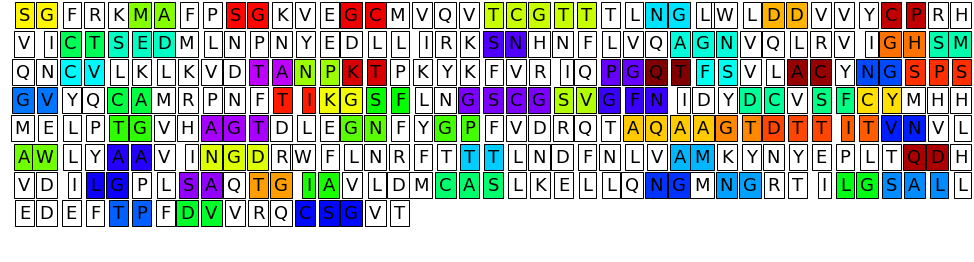

In [54]:
cd = population.refragmentation_colordict(chessboards[0.05])
population.display_sequences(colordict = cd)

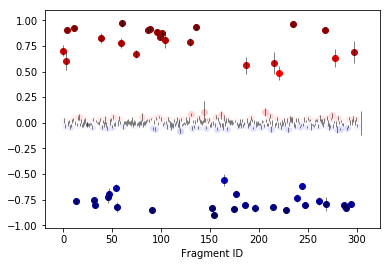

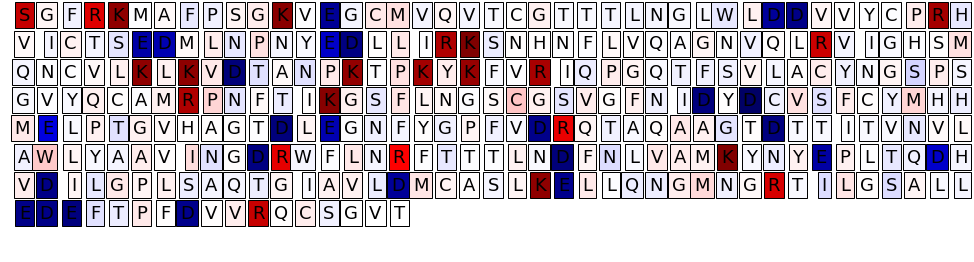

In [53]:
population.represent(color_by='charge')

In [45]:
view = {'A-LYS:88': ['A-LYS:88'], 'A-GLY:15+A-CYS:16': ['A-GLY:15', 'A-CYS:16'], 'A-LEU:67': ['A-LEU:67'], 'A-VAL:68+A-GLN:69': ['A-VAL:68', 'A-GLN:69'], 'A-THR:198+A-ASP:197': ['A-THR:198', 'A-ASP:197'], 'A-TYR:118': ['A-TYR:118'], 'A-MET:49': ['A-MET:49'], 'A-THR:111+A-GLN:110': ['A-THR:111', 'A-GLN:110'], 'A-SER:62+A-ASN:63': ['A-SER:62', 'A-ASN:63'], 'A-ASN:228+A-LEU:227': ['A-ASN:228', 'A-LEU:227'], 'A-ARG:298': ['A-ARG:298'], 'A-ILE:281': ['A-ILE:281'], 'A-SER:139+A-PHE:140': ['A-SER:139', 'A-PHE:140'], 'A-GLN:299': ['A-GLN:299'], u'A-VAL:303+A-CYS:300+A-GLY:302+A-SER:301': [u'A-VAL:303', u'A-CYS:300', u'A-GLY:302', u'A-SER:301'], 'A-ARG:217': ['A-ARG:217'], u'A-SER:123+A-SER:121+A-PRO:122': [u'A-SER:123', u'A-SER:121', u'A-PRO:122'], 'A-THR:292+A-PRO:293': ['A-THR:292', 'A-PRO:293'], u'A-VAL:204+A-ASN:203+A-THR:201+A-VAL:202': [u'A-VAL:204', u'A-ASN:203', u'A-THR:201', u'A-VAL:202'], 'A-MET:162': ['A-MET:162'], 'A-ALA:194+A-GLY:195+A-THR:196': ['A-ALA:194', 'A-GLY:195', 'A-THR:196'], 'A-ARG:60': ['A-ARG:60'], 'A-GLU:270': ['A-GLU:270'], 'A-LEU:75': ['A-LEU:75'], 'A-GLY:29+A-LEU:30': ['A-GLY:29', 'A-LEU:30'], 'A-TYR:209': ['A-TYR:209'], 'A-GLU:166+A-MET:165': ['A-GLU:166', 'A-MET:165'], 'A-ASN:238+A-TYR:237': ['A-ASN:238', 'A-TYR:237'], 'A-ARG:188': ['A-ARG:188'], 'A-ASN:180+A-PHE:181': ['A-ASN:180', 'A-PHE:181'], 'A-TYR:126': ['A-TYR:126'], 'A-SER:267+A-LEU:268': ['A-SER:267', 'A-LEU:268'], 'A-LEU:177': ['A-LEU:177'], 'A-LEU:242': ['A-LEU:242'], 'A-PRO:99+A-THR:98+A-LYS:97': ['A-PRO:99', 'A-THR:98', 'A-LYS:97'], 'A-ILE:259': ['A-ILE:259'], 'A-ILE:43': ['A-ILE:43'], 'A-ARG:105': ['A-ARG:105'], 'A-PHE:112': ['A-PHE:112'], 'A-SER:81+A-MET:82': ['A-SER:81', 'A-MET:82'], 'A-PRO:52+A-ASN:51': ['A-PRO:52', 'A-ASN:51'], 'A-GLU:288': ['A-GLU:288'], 'A-ARG:76': ['A-ARG:76'], 'A-VAL:212+A-ILE:213': ['A-VAL:212', 'A-ILE:213'], 'A-VAL:77+A-ILE:78': ['A-VAL:77', 'A-ILE:78'], 'A-MET:130': ['A-MET:130'], 'A-ILE:106': ['A-ILE:106'], 'A-LYS:269': ['A-LYS:269'], 'A-ASP:229+A-PHE:230': ['A-ASP:229', 'A-PHE:230'], 'A-TYR:239': ['A-TYR:239'], 'A-LEU:208': ['A-LEU:208'], 'A-MET:235': ['A-MET:235'], 'A-HIS:172': ['A-HIS:172'], 'A-ASN:84+A-CYS:85+A-VAL:86': ['A-ASN:84', 'A-CYS:85', 'A-VAL:86'], 'A-VAL:18+A-MET:17': ['A-VAL:18', 'A-MET:17'], 'A-PHE:66': ['A-PHE:66'], 'A-THR:25+A-THR:26': ['A-THR:25', 'A-THR:26'], 'A-PHE:223': ['A-PHE:223'], 'A-THR:280+A-ARG:279': ['A-THR:280', 'A-ARG:279'], 'A-ALA:193+A-GLN:192': ['A-ALA:193', 'A-GLN:192'], 'A-ASP:263+A-MET:264': ['A-ASP:263', 'A-MET:264'], 'A-PRO:132+A-ARG:131': ['A-PRO:132', 'A-ARG:131'], u'A-ASN:151+A-GLY:149+A-PHE:150': [u'A-ASN:151', u'A-GLY:149', u'A-PHE:150'], 'A-VAL:247+A-HIS:246': ['A-VAL:247', 'A-HIS:246'], 'A-GLN:127': ['A-GLN:127'], 'A-PRO:241+A-GLU:240': ['A-PRO:241', 'A-GLU:240'], 'A-ILE:59': ['A-ILE:59'], u'A-VAL:73+A-ALA:70+A-GLY:71+A-ASN:72': [u'A-VAL:73', u'A-ALA:70', u'A-GLY:71', u'A-ASN:72'], u'A-PRO:9+A-GLY:11+A-SER:10': [u'A-PRO:9', u'A-GLY:11', u'A-SER:10'], 'A-CYS:160+A-TYR:161': ['A-CYS:160', 'A-TYR:161'], 'A-VAL:297': ['A-VAL:297'], 'A-GLN:83': ['A-GLN:83'], 'A-GLN:256': ['A-GLN:256'], 'A-ALA:7+A-MET:6': ['A-ALA:7', 'A-MET:6'], 'A-HIS:164': ['A-HIS:164'], 'A-ARG:4': ['A-ARG:4'], 'A-HIS:163': ['A-HIS:163'], 'A-VAL:157+A-CYS:156+A-ASP:155': ['A-VAL:157', 'A-CYS:156', 'A-ASP:155'], 'A-ALA:206+A-TRP:207': ['A-ALA:206', 'A-TRP:207'], 'A-LEU:262': ['A-LEU:262'], u'A-ASP:92+A-ALA:94+A-THR:93': [u'A-ASP:92', u'A-ALA:94', u'A-THR:93'], 'A-LEU:141': ['A-LEU:141'], 'A-GLU:55+A-ASP:56+A-LEU:57': ['A-GLU:55', 'A-ASP:56', 'A-LEU:57'], 'A-GLY:183+A-PRO:184': ['A-GLY:183', 'A-PRO:184'], 'A-ASN:142+A-GLY:143+A-SER:144': ['A-ASN:142', 'A-GLY:143', 'A-SER:144'], 'A-THR:304': ['A-THR:304'], 'A-ALA:116+A-CYS:117': ['A-ALA:116', 'A-CYS:117'], 'A-GLU:14': ['A-GLU:14'], 'A-TRP:31': ['A-TRP:31'], 'A-ASP:153+A-ILE:152': ['A-ASP:153', 'A-ILE:152'], 'A-PRO:252+A-GLY:251+A-LEU:250': ['A-PRO:252', 'A-GLY:251', 'A-LEU:250'], 'A-VAL:91+A-LYS:90': ['A-VAL:91', 'A-LYS:90'], 'A-GLY:79+A-HIS:80': ['A-GLY:79', 'A-HIS:80'], u'A-THR:243+A-ASP:245+A-GLN:244': [u'A-THR:243', u'A-ASP:245', u'A-GLN:244'], 'A-GLY:179+A-GLU:178': ['A-GLY:179', 'A-GLU:178'], 'A-SER:147+A-VAL:148': ['A-SER:147', 'A-VAL:148'], 'A-PHE:291': ['A-PHE:291'], 'A-GLY:120+A-ASN:119': ['A-GLY:120', 'A-ASN:119'], 'A-LIG:306': ['A-LIG:306'], 'A-LIG:305': ['A-LIG:305'], 'A-LEU:271': ['A-LEU:271'], 'A-LEU:272': ['A-LEU:272'], 'A-GLY:278+A-ASN:277': ['A-GLY:278', 'A-ASN:277'], 'A-TYR:37': ['A-TYR:37'], 'A-GLN:74': ['A-GLN:74'], 'A-LEU:58': ['A-LEU:58'], 'A-LYS:100': ['A-LYS:100'], 'A-LYS:102': ['A-LYS:102'], 'A-LEU:50': ['A-LEU:50'], 'A-VAL:13+A-LYS:12': ['A-VAL:13', 'A-LYS:12'], 'A-THR:199+A-ILE:200': ['A-THR:199', 'A-ILE:200'], u'A-ASP:176+A-ALA:173+A-GLY:174+A-THR:175': [u'A-ASP:176', u'A-ALA:173', u'A-GLY:174', u'A-THR:175'], 'A-PHE:8': ['A-PHE:8'], 'A-ARG:40': ['A-ARG:40'], 'A-LEU:287': ['A-LEU:287'], 'A-GLN:273': ['A-GLN:273'], 'A-GLY:275+A-ASN:274': ['A-GLY:275', 'A-ASN:274'], 'A-ALA:234+A-VAL:233': ['A-ALA:234', 'A-VAL:233'], 'A-PRO:168+A-LEU:167': ['A-PRO:168', 'A-LEU:167'], 'A-ASP:289+A-GLU:290': ['A-ASP:289', 'A-GLU:290'], 'A-LEU:205': ['A-LEU:205'], 'A-GLY:109+A-PRO:108': ['A-GLY:109', 'A-PRO:108'], 'A-GLN:107': ['A-GLN:107'], 'A-GLY:283+A-LEU:282': ['A-GLY:283', 'A-LEU:282'], 'A-ALA:255+A-SER:254': ['A-ALA:255', 'A-SER:254'], 'A-ASN:231+A-LEU:232': ['A-ASN:231', 'A-LEU:232'], 'A-ASP:33+A-ASP:34': ['A-ASP:33', 'A-ASP:34'], 'A-VAL:104+A-PHE:103': ['A-VAL:104', 'A-PHE:103'], 'A-PHE:294': ['A-PHE:294'], 'A-LEU:89': ['A-LEU:89'], 'A-THR:224+A-THR:225+A-THR:226': ['A-THR:224', 'A-THR:225', 'A-THR:226'], u'A-ASP:48+A-SER:46+A-GLU:47': [u'A-ASP:48', u'A-SER:46', u'A-GLU:47'], 'A-LEU:115': ['A-LEU:115'], 'A-ASN:28+A-LEU:27': ['A-ASN:28', 'A-LEU:27'], 'A-MET:276': ['A-MET:276'], 'A-SER:158+A-PHE:159': ['A-SER:158', 'A-PHE:159'], 'A-LEU:87': ['A-LEU:87'], 'A-GLY:124+A-VAL:125': ['A-GLY:124', 'A-VAL:125'], u'A-VAL:20+A-THR:24+A-THR:21+A-GLY:23+A-CYS:22': [u'A-VAL:20', u'A-THR:24', u'A-THR:21', u'A-GLY:23', u'A-CYS:22'], 'A-TRP:218': ['A-TRP:218'], 'A-ALA:191+A-THR:190': ['A-ALA:191', 'A-THR:190'], 'A-ASP:216+A-GLY:215+A-ASN:214': ['A-ASP:216', 'A-GLY:215', 'A-ASN:214'], 'A-ASN:221+A-ARG:222': ['A-ASN:221', 'A-ARG:222'], 'A-PHE:185': ['A-PHE:185'], 'A-GLN:19': ['A-GLN:19'], 'A-LYS:61': ['A-LYS:61'], 'A-VAL:36+A-VAL:35': ['A-VAL:36', 'A-VAL:35'], 'A-GLY:258+A-THR:257': ['A-GLY:258', 'A-THR:257'], 'A-LYS:5': ['A-LYS:5'], 'A-ASN:53+A-TYR:54': ['A-ASN:53', 'A-TYR:54'], 'A-LEU:253': ['A-LEU:253'], 'A-ASP:295+A-VAL:296': ['A-ASP:295', 'A-VAL:296'], 'A-LEU:32': ['A-LEU:32'], 'A-GLY:138+A-LYS:137': ['A-GLY:138', 'A-LYS:137'], 'A-TYR:182': ['A-TYR:182'], 'A-VAL:186+A-ASP:187': ['A-VAL:186', 'A-ASP:187'], 'A-ASP:248+A-ILE:249': ['A-ASP:248', 'A-ILE:249'], 'A-SER:1+A-GLY:2+A-PHE:3': ['A-SER:1', 'A-GLY:2', 'A-PHE:3'], 'A-ALA:211+A-ALA:210': ['A-ALA:211', 'A-ALA:210'], 'A-LYS:236': ['A-LYS:236'], 'A-SER:284+A-ALA:285+A-LEU:286': ['A-SER:284', 'A-ALA:285', 'A-LEU:286'], 'A-ALA:129+A-CYS:128': ['A-ALA:129', 'A-CYS:128'], 'A-TYR:101': ['A-TYR:101'], 'A-CYS:38+A-PRO:39': ['A-CYS:38', 'A-PRO:39'], 'A-TYR:154': ['A-TYR:154'], 'A-LEU:220': ['A-LEU:220'], 'A-GLN:189': ['A-GLN:189'], 'A-SER:113+A-VAL:114': ['A-SER:113', 'A-VAL:114'], 'A-ALA:260+A-VAL:261': ['A-ALA:260', 'A-VAL:261'], 'A-THR:135+A-ILE:136': ['A-THR:135', 'A-ILE:136'], 'A-ASN:95+A-PRO:96': ['A-ASN:95', 'A-PRO:96'], 'A-ASN:65+A-HIS:64': ['A-ASN:65', 'A-HIS:64'], 'A-PHE:219': ['A-PHE:219'], 'A-GLY:146': ['A-GLY:146'], 'A-ASN:133+A-PHE:134': ['A-ASN:133', 'A-PHE:134'], 'A-VAL:171+A-GLY:170+A-THR:169': ['A-VAL:171', 'A-GLY:170', 'A-THR:169'], 'A-VAL:42+A-HIS:41': ['A-VAL:42', 'A-HIS:41'], 'A-ALA:266+A-CYS:265': ['A-ALA:266', 'A-CYS:265'], u'A-LIG:307+A-GLY:146+A-CYS:145': [u'A-GLY:146', u'A-CYS:145'], 'A-CYS:44+A-THR:45': ['A-CYS:44', 'A-THR:45']}

In [48]:
self=population
print {refrag: sum(self[f].q0[0] for f in remap) for refrag, remap in view.items()}

{'A-LYS:88': 0.9062412000000004, 'A-GLY:15+A-CYS:16': -0.027481699999998832, 'A-LEU:67': 0.0361838999999996, 'A-VAL:68+A-GLN:69': 0.015257599999998206, 'A-THR:198+A-ASP:197': -0.8697567000000003, 'A-TYR:118': -0.032139899999999, 'A-MET:49': 0.10448420000000025, 'A-THR:111+A-GLN:110': -0.06959379999999904, 'A-SER:62+A-ASN:63': -0.006997000000000808, 'A-ASN:228+A-LEU:227': 0.015201399999998588, 'A-THR:280+A-ARG:279': 0.6254108, 'A-ILE:281': -0.005959499999999451, 'A-SER:139+A-PHE:140': 0.04117020000000049, 'A-GLN:299': -0.03470170000000061, u'A-VAL:303+A-CYS:300+A-GLY:302+A-SER:301': -0.016366199999999775, 'A-ARG:217': 0.6303502000000011, u'A-SER:123+A-SER:121+A-PRO:122': -0.04278560000000042, 'A-THR:292+A-PRO:293': -0.017135499999999748, u'A-VAL:204+A-ASN:203+A-THR:201+A-VAL:202': -0.054436700000001115, 'A-MET:162': 0.0734643999999991, 'A-ALA:194+A-GLY:195+A-THR:196': -0.036237299999999695, 'A-ARG:60': 0.7867303999999993, 'A-GLU:270': -0.8841951000000009, 'A-LEU:75': 0.01210369999999982

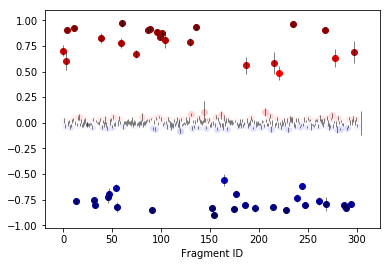

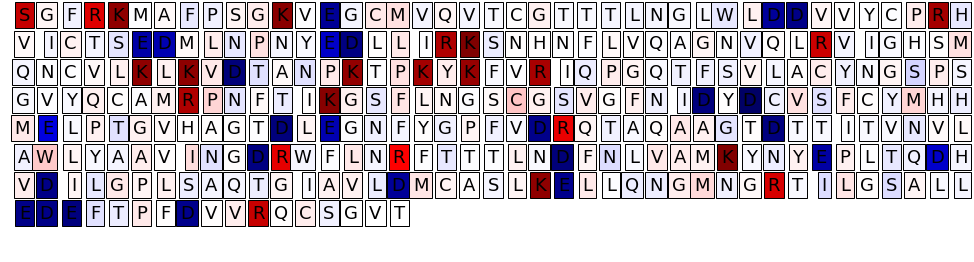

In [41]:
population.represent(color_by='charge')

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


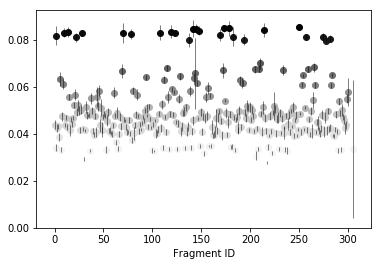

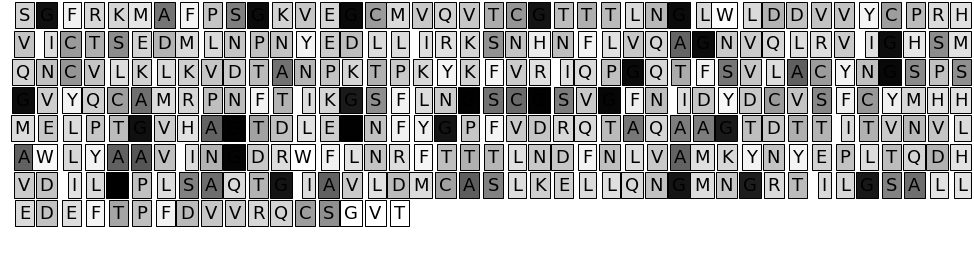

In [35]:
from numpy import min as mn, max as mx, mean
pvs = population.populations['purity'].datas
population.represent(field_vals=mean(pvs,axis=0),errors=0.5*(mx(pvs,axis=0)-mn(pvs,axis=0)),color_by='purity')

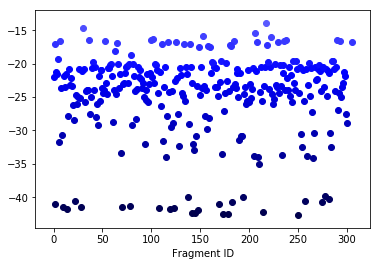

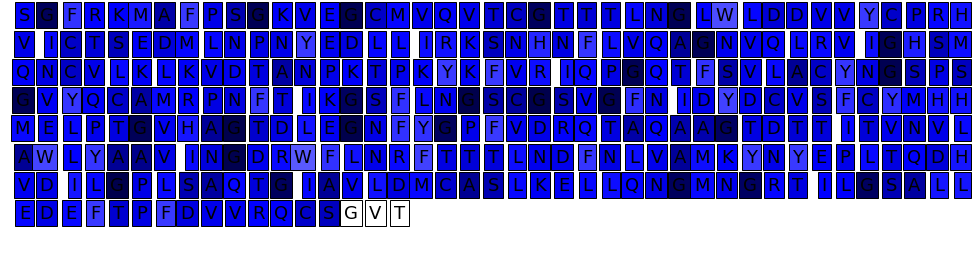

In [27]:
population.represent(field_vals=0.5*(maxa-mina))

In [45]:
import json
tt=json.load(open('/tmp/cached_refragment.json'))

In [58]:
posinp=tt['0.05'][0]['positions']
units=tt['0.05'][0]['units']

In [65]:
Systems.GetFragTuple('A-ALA:116')

('A', 'ALA:116')

In [66]:
from BigDFT import Systems
reload(Systems)
sys = Systems.system_from_dict_positions(posinp=posinp,units=units)

In [71]:
tt = population._cached_refragment['0.05']

In [72]:
tt[0]

In [73]:
population.refragment()

KeyError: 'positions'

In [15]:
def create_mapping(refrag):
    return {frag:frag.split('+') for frag in refrag}
        

In [30]:
newp,newbo = population.bigdft_tool.update_purity_and_bo(create_mapping(population.refragment(0.025)[0]),
                                            population.purities,population.bond_orders,
                                            {frag: f.qcharge for frag, f in population.items()})

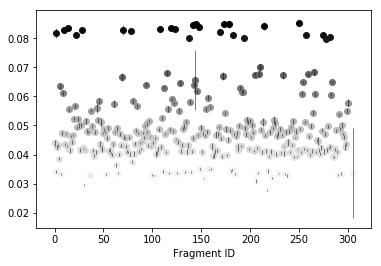

In [25]:
population.fragment_scatterplot(color_by='purity')


In [26]:
from matplotlib import pyplot as plt

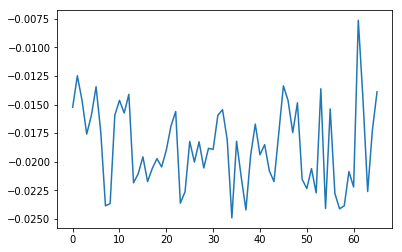

In [31]:
plt.plot(newp.values())

In [2]:
from pickle import load
pname = "updated-data.pickle"
with open(pname, "rb") as ifile:
    data = load(ifile)

In [3]:
from multiprocessing import Pool
from pickle import load, dump
import time
from BigDFT import BioQM
from BigDFT.Systems import System
from os.path import join
from os.path import exists

# Read in the data
pname = "updated-data.pickle"
with open(pname, "rb") as ifile:
    data = load(ifile)
    

# Fill in this routine with all of the loading you want to do
def read(geom):
    cname = join(cache, geom + ".pickle")

    try:
        with open(cname, "rb") as ifile:
            sys = load(ifile)
    except:
        fname = join(outdir, geom + "-XTB-1.1.tar.bz2")
        options = dict(sequence_from_fragments=True, disable_warnings=True)
        sys = BioQM.load(fname, options=options)
        energies = sys.interactions
        purities = sys.purities
        bond_orders = sys.bond_orders
        
        for attr in ["_atomic_purities", "_atomic_BO", "_atomic_interactions"]:
            if hasattr(sys, attr):
                delattr(sys, attr)
        
        with open(cname, "wb") as ofile:
            dump(sys, ofile)
        
    return geom, sys

# Set the number of threads yourself
numthreads = 3
p = Pool(numthreads)

# Actual call 
geoms = data["Crystal ID"][:]
systems = {}
start = time.time()
# res = p.map(read, geoms)
res = []
for g in geoms:
    print(g)
    res.append(read(g))
end = time.time()
print(end - start)

# Unpack results into this dictionary
for val in res:
    g = val[0]
    systems[g] = val[1]

Mpro-x0072
Mpro-x0104
Mpro-x0107
Mpro-x0161
Mpro-x0195
Mpro-x0305
Mpro-x0354
Mpro-x0387
Mpro-x0395
Mpro-x0397
Mpro-x0426
Mpro-x0434
Mpro-x0540
Mpro-x0678
Mpro-x0874
Mpro-x0946
Mpro-x0967
Mpro-x0991
Mpro-x0995
Mpro-x1077
Mpro-x1093
Mpro-x1249
Mpro-x0689
Mpro-x0691
Mpro-x0692
Mpro-x0705
Mpro-x0708
Mpro-x0731
Mpro-x0734
Mpro-x0736
Mpro-x0749
Mpro-x0752
Mpro-x0755
Mpro-x0759
Mpro-x0769
Mpro-x0770
Mpro-x0771
Mpro-x0774
Mpro-x0786
Mpro-x0820
Mpro-x0830
Mpro-x0831
Mpro-x0978
Mpro-x0981
Mpro-x1308
Mpro-x1311
Mpro-x1334
Mpro-x1336
Mpro-x1348
Mpro-x1351
Mpro-x1358
Mpro-x1374
Mpro-x1375
Mpro-x1380
Mpro-x1382
Mpro-x1384
Mpro-x1385
Mpro-x1386
Mpro-x1392
Mpro-x1402
Mpro-x1412
Mpro-x1418
Mpro-x1425
Mpro-x1458
Mpro-x1478
Mpro-x1493
Mpro-x0887
Mpro-x1187
Mpro-x1012
Mpro-x0390
Mpro-x0464
Mpro-x0425
Mpro-x0398
Mpro-x0669
Mpro-x1163
Mpro-x0478
Mpro-x0177
Mpro-x0194
Mpro-x1226
Mpro-x1235
Mpro-x0350
Mpro-x1002
Mpro-x1132
Mpro-x1237
Mpro-x0499
Mpro-x1119
Mpro-x0376
Mpro-x0165
Mpro-x0336
Mpro-x1086
Mpro-x1101

First, let's analyze this data so we can understand the broad trends in variance in purity across samples.

In [4]:
from BigDFT.Systems import GetFragTuple

mindict = {}
maxlookup = {}
maxdict = {}
avgdict = {}
count = {}

for g in geoms:
    for fragid, pv in systems[g].purities.items():
        pv = abs(pv)
        if "LIG" in fragid or "FRA" in fragid:
            continue
            
        if fragid not in mindict:
            mindict[fragid] = pv
        elif mindict[fragid] > pv:
            mindict[fragid] = pv
        
        if fragid not in maxdict:
            maxdict[fragid] = pv
            maxlookup[fragid] = g
        elif maxdict[fragid] < pv:
            maxdict[fragid] = pv
            maxlookup[fragid] = g
            
        if fragid not in avgdict:
            avgdict[fragid] = pv
            count[fragid] = 1
        else:
            avgdict[fragid] += pv
            count[fragid] += 1
            
for fragid in avgdict:
    avgdict[fragid] /= count[fragid]
    
deviation = {}
for fragid in mindict:
    deviation[fragid] = abs(mindict[fragid] - maxdict[fragid])

order = sorted(mindict, key=avgdict.get)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


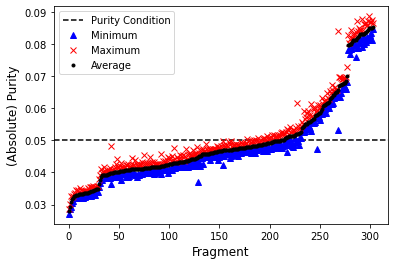

In [5]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(6,4))
axs.axhline(0.05, color='k', linestyle='--', label="Purity Condition")
axs.plot([mindict[x] for x in order], 'b^', label="Minimum")
axs.plot([maxdict[x] for x in order], 'rx', label="Maximum")
axs.plot([avgdict[x] for x in order], 'k.', label="Average")
axs.set_xlabel("Fragment", fontsize=12)
axs.set_ylabel("(Absolute) Purity", fontsize=12)
axs.legend()
plt.savefig(join("pictures", "pdeviation.eps"))

In [6]:
distribution = {x: maxdict[x] - mindict[x] for x in maxdict}
for fragid in sorted(distribution, key=distribution.get, reverse=True):
    if abs(distribution[fragid]) > 0.005:
        print(fragid, distribution[fragid], maxlookup[fragid])

A-CYS:145 0.030615910129419152 Mpro-x1308
A-SER:301 0.012200494707174617 Mpro-x0434
A-THR:225 0.011972412663658706 Mpro-x1336
A-THR:304 0.011893814404302025 Mpro-x0195
A-VAL:303 0.008735230075572725 Mpro-x1478
A-GLY:71 0.008610979501187638 Mpro-x0387
A-CYS:44 0.00853170665945139 Mpro-x1334
A-GLY:2 0.008355049163353667 Mpro-x0177
A-GLY:183 0.007986584399953103 Mpro-x1235
A-GLU:166 0.0075586504088058296 Mpro-x1093
A-ASP:48 0.007251169942995878 Mpro-x0731
A-GLY:143 0.007217826673383401 Mpro-x0387
A-CYS:265 0.0066226931321647226 Mpro-x0669
A-ALA:173 0.006281809023401988 Mpro-x1101-1
A-GLY:109 0.00623623038297029 Mpro-x0376
A-ALA:70 0.0062319516997089985 Mpro-x0464
A-GLY:179 0.0062011308465882015 Mpro-x1101-0
A-MET:49 0.006137185984243156 Mpro-x1351
A-MET:162 0.00596992378003975 Mpro-x0736
A-ALA:7 0.005947849247161442 Mpro-x1132
A-GLY:138 0.005889023842875291 Mpro-x0887
A-GLU:270 0.0058817560171604485 Mpro-x1493
A-GLY:215 0.005879462232056848 Mpro-x0734
A-GLY:120 0.005794907097163349 Mpro-x

Now we can move to auto fragmentation.

In [7]:
from BigDFT.PostProcessing import BigDFTool
btool = BigDFTool()

In [8]:
def get_target(purities):
    mindict = {}
    for g in purities:
        mindict[g] = min(purities[g].values())
    target = min(mindict, key=mindict.get)
    return target, min(purities[target].values())

In [9]:
tail = ["A-GLY:302", "A-VAL:303", "A-THR:304"]

In [10]:
from copy import deepcopy
from BigDFT.Systems import System

resys = {}
purities = {}
bond_orders = {}

for g in data["Crystal ID"][:]:
    resys[g] = System(systems[g])
    purities[g] = deepcopy(systems[g].purities)
    bond_orders[g] = deepcopy(systems[g].bond_orders)

    # Remove the ligands
    fraglist = deepcopy(list(resys[g].keys()))
    for fragid in fraglist:
        if "FRA" in fragid or "LIG" in fragid or  fragid in tail:
            del resys[g][fragid]
            del purities[g][fragid]
            del bond_orders[g][fragid]
    
    for f1 in bond_orders[g]:
        fraglist = deepcopy(list(bond_orders[g][f1]))
        for f2 in fraglist:
            if "FRA" in f2 or "LIG" in f2 or f2 in tail:
                del bond_orders[g][f1][f2]

In [11]:
target, minval = get_target(purities)

In [12]:
charges = {x: sum([z.nel for z in y]) for x, y in resys[target].items()}

In [ ]:
from BigDFT.Fragments import Fragment

target, minval = get_target(purities)

while (abs(minval) > 0.05):
    print("Current worst purity value", minval, target)
    fw = FragmentView(resys[target]) # from BioSystems
    mapping = resys[target].refragment(fw,0.05)
          
    # Update the other systems
    for g in data["Crystal ID"][:]:
        fw_g = FragmentView(resys[g])
        fw_g_new = fw.refragment(mapping)
        
        resys[g] = impose_view(fw_g_new)
    
    target, minval = get_target(purities)

In [13]:
from BigDFT.Fragments import Fragment

target, minval = get_target(purities)

while (abs(minval) > 0.05):
    print("Current worst purity value", minval, target)
    autofrag = btool.auto_fragment(resys[target], purities[target], bond_orders[target], 0.05)
    
    # Create the mapping
    mapping = {}
    for fragid in autofrag:
        mapping[fragid.replace("+","#")] = [x for x in fragid.split("+")]
        
    # Update the other systems
    for g in data["Crystal ID"][:]:
        charges = {x: sum([z.nel for z in y]) for x, y in resys[g].items()}
        new_pv, new_bo = btool.update_purity_and_bo(mapping, purities[g], bond_orders[g], charges)

        new_sys = System()
        for f1, fraglist in mapping.items():
            new_sys[f1] = Fragment()
            for f2 in fraglist:
                new_sys[f1] += resys[g][f2]

        resys[g] = new_sys
        purities[g] = new_pv
        bond_orders[g] = new_bo
    
    target, minval = get_target(purities)

Current worst purity value -0.08858190720233974 Mpro-x0387
Current worst purity value -0.05353204603556079 Mpro-x0731
Current worst purity value -0.05227877682142599 Mpro-x1374
Current worst purity value -0.051511988386888745 Mpro-x0395
Current worst purity value -0.051411330738778384 Mpro-x0354
Current worst purity value -0.05105204697579718 Mpro-x1163
Current worst purity value -0.050680411008359266 Mpro-x0752
Current worst purity value -0.05055960191492771 Mpro-x0540
Current worst purity value -0.05055134169467742 Mpro-x0831
Current worst purity value -0.05032820945976135 Mpro-x1101-1
Current worst purity value -0.050090332177578904 Mpro-x0769
Current worst purity value -0.050069299668078486 Mpro-x1119


In [14]:
mindict = {}
maxdict = {}
maxlookup = {}
avgdict = {}
count = {}

for sys in data["Crystal ID"][:]:
    for fragid, pv in purities[sys].items():
        pv = abs(pv)
        if fragid not in mindict:
            mindict[fragid] = pv
        elif mindict[fragid] > pv:
            mindict[fragid] = pv
        
        if fragid not in maxdict:
            maxdict[fragid] = pv
            maxlookup[fragid] = sys
        elif maxdict[fragid] < pv:
            maxdict[fragid] = pv
            maxlookup[fragid] = sys
            
        if fragid not in avgdict:
            avgdict[fragid] = pv
            count[fragid] = 1
        else:
            avgdict[fragid] += pv
            count[fragid] += 1
            
for fragid in avgdict:
    avgdict[fragid] /= count[fragid]
    
deviation = {}
for fragid in mindict:
    deviation[fragid] = abs(mindict[fragid] - maxdict[fragid])

order = sorted(mindict, key=avgdict.get)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


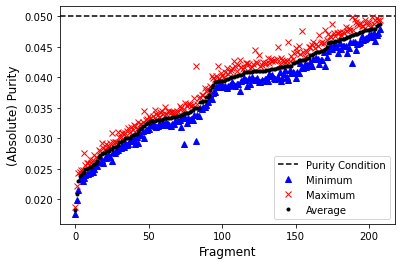

In [15]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1,1, figsize=(6,4))
axs.axhline(0.05, color='k', linestyle='--', label="Purity Condition")
axs.plot([mindict[x] for x in order], 'b^', label="Minimum")
axs.plot([maxdict[x] for x in order], 'rx', label="Maximum")
axs.plot([avgdict[x] for x in order], 'k.', label="Average")
axs.set_xlabel("Fragment", fontsize=12)
axs.set_ylabel("(Absolute) Purity", fontsize=12)
axs.legend()
plt.savefig(join("pictures", "pdeviation.eps"))

In [16]:
distribution = {x: maxdict[x] - mindict[x] for x in maxdict}
for fragid, d in distribution.items():
    if abs(d) > 0.005:
        print(fragid, d, maxlookup[fragid])

A-MET:49 0.006137185984243149 Mpro-x1351
A-CYS:145#A-GLY:143#A-SER:144 0.012294142449482355 Mpro-x1308
A-MET:162 0.00596992378003975 Mpro-x0736
A-GLU:166 0.007558650408805823 Mpro-x1093
A-MET:235 0.005016914927846235 Mpro-x0991
A-GLU:270 0.0058817560171604485 Mpro-x1493
A-SER:301#A-CYS:300 0.005719487512443718 Mpro-x0195


In [17]:
biosys = BioQM.load(join(outdir, data["Crystal ID"][0] + "-XTB-1.1.tar.bz2"),
                    options=dict(sequence_from_fragments=True, disable_warnings=True))

In [18]:
colorlist = []
# for f1 in biosys.fragment_names:
for f1 in biosys.keys():
    for f2 in purities[data["Crystal ID"][0] ]:
        if f1 in f2:
            colorlist.append(distribution[f2])
            break

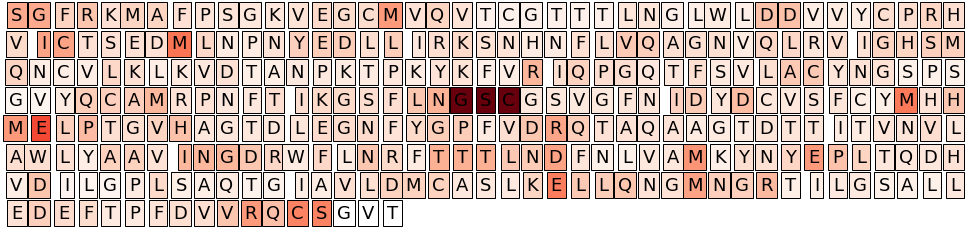

In [19]:
biosys.display_sequences(field_vals=colorlist)

## Strongest Interactors
Now we try to investigate the strongest interacting fragments. 

In [20]:
strengths = {}
full_strengths = {}
for g in geoms:
    full_strengths[g] = 0.0
    for fid1, f1 in systems[g].interactions.items():
        if "FRA" not in fid1 and "LIG" not in fid1:
            continue
        temp = 0.0
        for fid2, f2 in f1.items():
            if "FRA" in fid2 or "LIG" in fid2:
                continue
            temp += f2
        if abs(temp) > 0.05:
            strengths[(g,fid1)] = temp
        full_strengths[g] += temp

First summarize the total interaction strength.

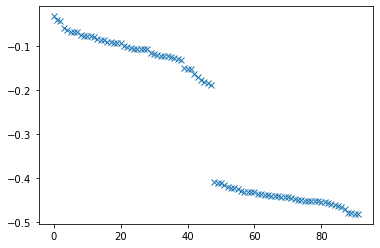

In [21]:
fig, axs = plt.subplots(1,1)
axs.plot(sorted(full_strengths.values(), reverse=True), 'x')

Text(0, 0.5, 'Interaction Strength')

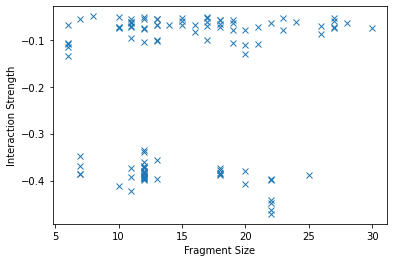

In [22]:
fig, axs = plt.subplots(1,1)
sizes = [len(systems[x[0]][x[1]]) for x in strengths]
values = list(strengths.values())

axs.plot(sizes, values, 'x')
axs.set_xlabel("Fragment Size")
axs.set_ylabel("Interaction Strength")

In [23]:
from os import system
from BigDFT.IO import write_pdb

smiles = {}
for g, f1 in strengths:
    name = str(g) + "-" + f1
    oname1 = join(cache, name+"-strongest.pdb")
    oname2 = join(cache, name+"-strongest.smiles")
    
    sys = System()
    sys[f1] = systems[g][f1]
    
    with open(oname1, "w") as ofile:
        write_pdb(sys, ofile)
    
    system("obabel -ipdb " + oname1 + " -ocan > " + oname2)
    
    with open(oname2) as ifile:
        smiles[(g, f1)] = next(ifile).split()[0]

In [24]:
covalent_lookup = {}
for g, c in zip(data["Crystal ID"], data["Site"]):
    covalent_lookup[g] = "cov" in c

for g, f1 in sorted(strengths, key=strengths.get, reverse=False):
#     if covalent_lookup[g]:
        print(g, f1, smiles[(g,f1)], strengths[(g,f1)], covalent_lookup[g])

Mpro-x0731 A-LIG:305 OS(N1CCN(CC1)C(=O)C)O -0.4708739555849365 True
Mpro-x0691 A-LIG:306 OS(N1CCN(CC1)C(=O)C)O -0.4618692302722154 True
Mpro-x0769 A-LIG:306 OS(N1CCN(CC1)C(=O)C)O -0.4483691139121299 True
Mpro-x1336 A-LIG:305 OS(N1CCN(CC1)C(=O)C)O -0.4407767246297145 True
Mpro-x0708 A-LIG:305 O=CNNC(=O)C -0.4213614961974834 True
Mpro-x0752 A-LIG:306 CNC(=O)C -0.4116628527137513 True
Mpro-x1375 A-LIG:305 CC(=O)N[C@@H]1CCS(=O)(=O)C1 -0.4069038124852839 True
Mpro-x0771 A-LIG:306 OS(N1CCN(CC1)C(=O)C)O -0.3984779041577044 True
Mpro-x1493 A-LIG:306 CC(=O)N(C)C -0.39843686349287677 True
Mpro-x0820 A-LIG:306 CCNC(=O)C -0.3961975698172323 True
Mpro-x0734 A-LIG:307 CC(=O)N(C)C -0.39578959220995047 True
Mpro-x1418 A-LIG:306 CN1CCN(CC1)C(=O)C -0.3954829304365555 True
Mpro-x0759 A-LIG:305 CC(=O)N(C)C -0.3945419570436842 True
Mpro-x0755 A-LIG:307 CC(=O)N(C)C -0.39376456768415613 True
Mpro-x0692 A-LIG:306 CC(=O)N(C)C -0.39334362460409944 True
Mpro-x0689 A-LIG:305 CC(=O)N(C)C -0.39209056672473747 True
